In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_excel('Healthcare_dataset.xlsx', sheet_name='Dataset')


In [6]:
df.head(5)

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


More information about the dataset

In [4]:
print(df.info(verbose=True)) #check number of columns and rows, and the data types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

Check for missing data

In [4]:
print(df.isna().sum().sum())

0


Check for duplicate data

In [6]:
df.duplicated().sum()


0

Remove Paient ID field which isn't needed

In [4]:
df.drop(columns= ['Ptid'],inplace= True)


In [5]:
df

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
1,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
2,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,Y,N,N,N,N,N,N,N,2
3,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,1
4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,...,N,N,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,Y,N,N,N,N,N,N,1
3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,N,...,N,N,Y,N,N,N,N,N,N,1
3422,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0


check the outliers for numerical variables



In [29]:
import seaborn as sns


<AxesSubplot:xlabel='Count_Of_Risks'>

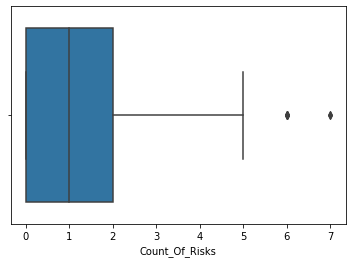

In [10]:
sns.boxplot(x=df["Count_Of_Risks"])


<AxesSubplot:xlabel='Dexa_Freq_During_Rx'>

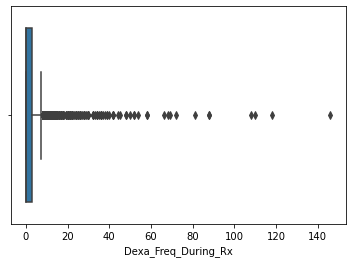

In [11]:
sns.boxplot(x=df['Dexa_Freq_During_Rx'])


Both Count_of_Risks and Dexa_Freq_Durig_Rx contains outliers

In [11]:
df.mean()

<ipython-input-11-c61f0c8f89b5>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


Dexa_Freq_During_Rx    3.016063
Count_Of_Risks         1.239486
dtype: float64

In [12]:
df.mode()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1.0
1,P10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,P995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3420,P996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3421,P997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3422,P998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.median()

<ipython-input-15-6d467abf240d>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


Dexa_Freq_During_Rx    0.0
Count_Of_Risks         1.0
dtype: float64

Replace Dexa_Freq_During_RX outliers with upper bound value

In [6]:
Dexa= df["Dexa_Freq_During_Rx"]


In [7]:
Dexa

0       0
1       0
2       0
3       0
4       0
       ..
3419    0
3420    0
3421    7
3422    0
3423    0
Name: Dexa_Freq_During_Rx, Length: 3424, dtype: int64

In [8]:

Q1=Dexa.quantile(0.25)
Q3=Dexa.quantile(0.75)
IQR=Q3-Q1

In [9]:
lower_bound= Q1-1.5*IQR
upper_bound= Q3+ 1.5*IQR

In [10]:
upper_bound


7.5

In [11]:
outlier_dexa= (Dexa< lower_bound) | (Dexa> upper_bound)


In [12]:
df[outlier_dexa]


,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
32,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
33,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
62,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
65,Persistent,Female,Asian,Not Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,2
89,Non-Persistent,Female,Other/Unknown,Not Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,...,Y,N,Y,N,N,N,N,N,N,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,Persistent,Female,Caucasian,Not Hispanic,South,>75,ORTHOPEDIC SURGERY,Others,OB/GYN/Others/PCP/Unknown,N,...,Y,N,Y,N,N,N,N,N,N,2
3396,Persistent,Female,Caucasian,Not Hispanic,South,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,Y,N,N,N,N,N,N,1
3400,Non-Persistent,Female,Caucasian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,2
3411,Persistent,Female,Caucasian,Not Hispanic,South,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,Y,N,N,N,N,N,N,1


In [13]:
Dexa[outlier_dexa]

32      20
33      13
62      12
65      20
89      10
        ..
3384    12
3396    10
3400    12
3411     8
3414     8
Name: Dexa_Freq_During_Rx, Length: 460, dtype: int64

In [14]:
Dexa[outlier_dexa]=upper_bound


<ipython-input-14-5d4d86c66e92>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dexa[outlier_dexa]=upper_bound


In [15]:
Dexa[outlier_dexa]


32      7.5
33      7.5
62      7.5
65      7.5
89      7.5
       ... 
3384    7.5
3396    7.5
3400    7.5
3411    7.5
3414    7.5
Name: Dexa_Freq_During_Rx, Length: 460, dtype: float64

In [16]:
df[outlier_dexa]


,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
32,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
33,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
62,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
65,Persistent,Female,Asian,Not Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,2
89,Non-Persistent,Female,Other/Unknown,Not Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,...,Y,N,Y,N,N,N,N,N,N,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,Persistent,Female,Caucasian,Not Hispanic,South,>75,ORTHOPEDIC SURGERY,Others,OB/GYN/Others/PCP/Unknown,N,...,Y,N,Y,N,N,N,N,N,N,2
3396,Persistent,Female,Caucasian,Not Hispanic,South,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,Y,N,N,N,N,N,N,1
3400,Non-Persistent,Female,Caucasian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,2
3411,Persistent,Female,Caucasian,Not Hispanic,South,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,Y,N,N,N,N,N,N,1


Check again for outliers

<AxesSubplot:xlabel='Dexa_Freq_During_Rx'>

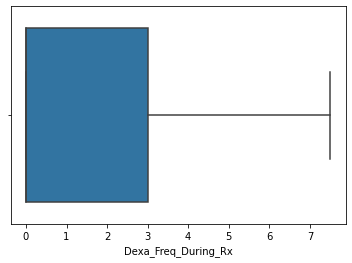

In [30]:
sns.boxplot(x=df['Dexa_Freq_During_Rx'])


Replace Count_Of_Risks outliers with upper bound value

In [17]:
Risks=df["Count_Of_Risks"]


In [18]:
Q1=Risks.quantile(0.25)
Q3=Risks.quantile(0.75)
IQR=Q3-Q1

In [19]:
lower_bound= Q1-1.5*IQR
upper_bound= Q3+ 1.5*IQR

In [20]:
upper_bound


5.0

In [21]:
outlier_risks= (Risks< lower_bound) | (Risks> upper_bound)


In [22]:
df[outlier_risks]


,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
342,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,N,...,Y,N,Y,Y,N,N,N,N,N,6
817,Persistent,Female,African American,Not Hispanic,South,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,...,Y,N,Y,Y,N,N,N,N,N,7
1059,Non-Persistent,Female,Caucasian,Not Hispanic,South,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,Y,Y,Y,N,N,N,Y,7
2601,Non-Persistent,Female,Caucasian,Not Hispanic,West,65-75,RHEUMATOLOGY,Specialist,Rheum,N,...,N,N,Y,Y,Y,N,N,N,Y,6
2860,Non-Persistent,Male,Caucasian,Not Hispanic,Northeast,65-75,RHEUMATOLOGY,Specialist,Rheum,Y,...,Y,N,Y,N,N,N,N,N,N,6
3045,Persistent,Female,Other/Unknown,Unknown,Midwest,55-65,RHEUMATOLOGY,Specialist,Rheum,N,...,Y,N,Y,N,N,N,N,N,N,6
3146,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,<55,RHEUMATOLOGY,Specialist,Rheum,N,...,N,Y,Y,Y,N,N,N,N,N,6
3340,Persistent,Female,Caucasian,Not Hispanic,Northeast,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,Y,...,Y,N,N,N,N,N,N,N,N,6


In [23]:
Risks[outlier_risks]


342     6
817     7
1059    7
2601    6
2860    6
3045    6
3146    6
3340    6
Name: Count_Of_Risks, dtype: int64

In [24]:
Risks[outlier_risks]=upper_bound


<ipython-input-24-b76dec390467>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Risks[outlier_risks]=upper_bound


In [25]:
Risks[outlier_risks]

342     5
817     5
1059    5
2601    5
2860    5
3045    5
3146    5
3340    5
Name: Count_Of_Risks, dtype: int64

Check again for outliers

<AxesSubplot:xlabel='Count_Of_Risks'>

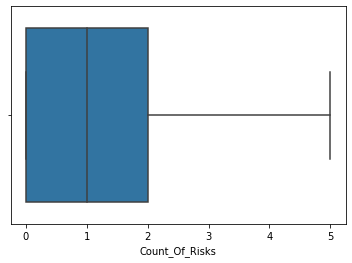

In [44]:
sns.boxplot(x=df["Count_Of_Risks"])


Check the normality of the numerical variables:



In [45]:
import matplotlib.pyplot as plt


(array([2488.,   24.,   24.,    0.,   46.,   68.,  114.,    0.,  107.,
         553.]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  , 3.75, 4.5 , 5.25, 6.  , 6.75, 7.5 ]),
 <BarContainer object of 10 artists>)

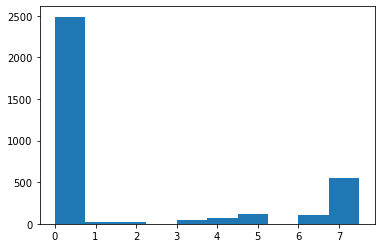

In [46]:
plt.hist(df["Dexa_Freq_During_Rx"])


(array([ 970.,    0., 1242.,    0.,  781.,    0.,  317.,    0.,   91.,
          23.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

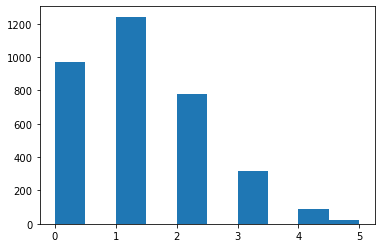

In [50]:
plt.hist(df["Count_Of_Risks"])


don't follow a normal distribution both skewed to the right therefore needs to be normalised

In [51]:
from sklearn.preprocessing import MinMaxScaler
normalse=MinMaxScaler()

In [52]:
df[["Count_Of_Risks", "Dexa_Freq_During_Rx"]] = normalse.fit_transform(df[["Count_Of_Risks", "Dexa_Freq_During_Rx"]])


Remove 'Risk_Segment_During_Rx','Tscore_Bucket_During_Rx','Change_T_Score','Change_Risk_Segment' columns due to more than 1490+ "unknown" values keeping the data will lead to inaccurate machine learning model

In [26]:
df.drop(['Risk_Segment_During_Rx','Tscore_Bucket_During_Rx','Change_T_Score','Change_Risk_Segment'], axis = 1, inplace = True)


In [64]:
df

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0.0
1,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0.0
2,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,Y,N,N,N,N,N,N,N,0.4
3,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0.2
4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,...,N,N,N,N,N,N,N,N,N,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,Y,N,N,N,N,N,N,0.2
3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0.0
3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,N,...,N,N,Y,N,N,N,N,N,N,0.2
3422,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0.0


In [74]:
from sklearn.preprocessing import LabelEncoder

In [75]:
final = df.apply(LabelEncoder().fit_transform)


In [76]:
final 

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,1,1,2,1,4,3,5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,4,0,5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,3,0,0,1,5,0,1,0,...,0,1,0,0,0,0,0,0,0,2
3,0,0,2,1,0,3,5,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,2,1,0,3,5,0,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,1,0,2,1,3,3,5,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3420,1,0,2,1,3,3,34,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3421,1,0,2,1,3,3,3,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3422,0,0,2,1,3,0,34,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Save final clean dataset

In [79]:
final.to_csv("Healthcare_cleaned.csv", index = False)